In [603]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# **Ex 1**


In [604]:
class GradientDescent:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.x = torch.randn(1, requires_grad=True)

    def f(self, x):
        return x**2

    def optimize(self):
        loss_list = []

        for i in range(self.num_iterations):
            y = self.f(self.x)

            # Compute gradients
            y.backward()

            # Update the parameter
            with torch.no_grad():
                self.x -= self.learning_rate * self.x.grad

            # Reset gradients to zero
            self.x.grad.zero_()

            loss_list.append(y.item())

        return loss_list

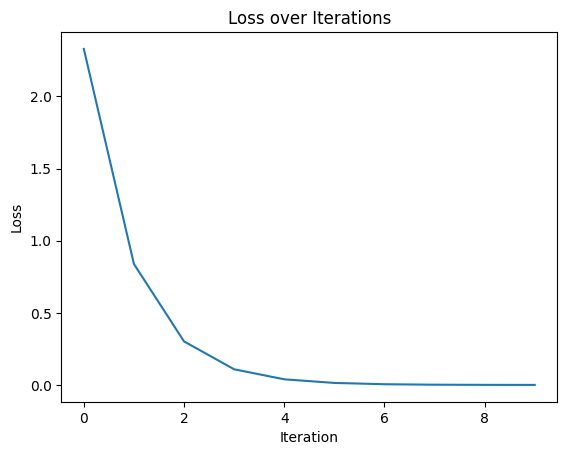

In [605]:
gd = GradientDescent(learning_rate=0.2, num_iterations= 10)
loss_list = gd.optimize()

# Plot the loss graph
iteration_list = range(10)
plt.plot(iteration_list, loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

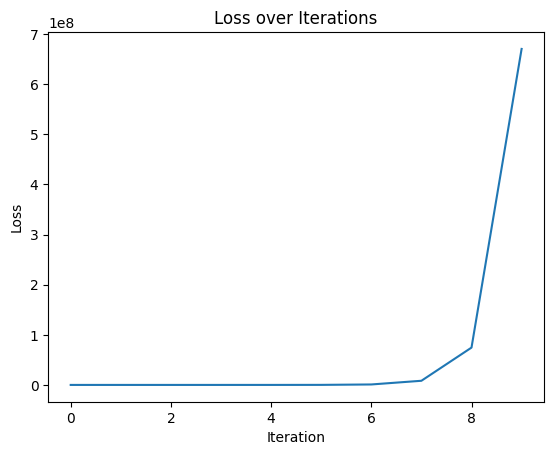

In [606]:
gd = GradientDescent(learning_rate=2, num_iterations= 10)
loss_list = gd.optimize()

# Plot the loss graph
iteration_list = range(10)
plt.plot(iteration_list, loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# **Ex 2**

### Implement Linear Regression

In [607]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.loss_history = []

    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias

    def train(self, x_train, y_train, learning_rate, num_iterations):
        num_samples, num_features = x_train.shape

        # Initialize weights and bias
        self.weights = torch.randn(num_features, 1, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

        for i in range(num_iterations):
            # Forward pass
            y_pred = self.forward(x_train)

            # Compute loss
            loss = torch.sum(y_train - y_pred)**2/(2*num_samples)
            self.loss_history.append(loss.item())

            # Compute gradients
            loss.backward()

            # Update weights and bias
            with torch.no_grad():
                self.weights -= learning_rate * self.weights.grad
                self.bias -= learning_rate * self.bias.grad

            # Reset gradients to zero
            self.weights.grad.zero_()
            self.bias.grad.zero_()

    def predict(self, x):
        return self.forward(x)

In [608]:
df = pd.read_csv(r"https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv")
df.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [610]:
np.random.seed(171)
train_sample = df.sample(frac=0.8)
remaining_indices = df.index.difference(train_sample.index)
# Select the remaining 20% of rows based on the calculated indices
test_sample = df.loc[remaining_indices]
test_sample

,Diện tích,Giá
9,51.7241,757.881
14,63.7931,952.261
16,68.6207,1069.780
22,83.1034,1251.900
27,95.1724,1469.690
29,100.0000,1515.280


In [611]:
x = torch.tensor(train_sample.reset_index()["Diện tích"].astype(np.float32))
y = torch.tensor(train_sample.reset_index()["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_train = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y_train = y.reshape(-1, 1)

In [612]:
x = torch.tensor(test_sample.reset_index()["Diện tích"].astype(np.float32))
y = torch.tensor(test_sample.reset_index()["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x_test = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y_test = y.reshape(-1, 1)

### Overshooting

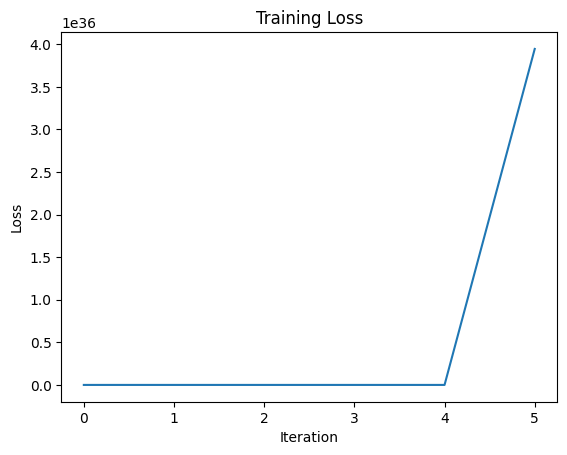

In [613]:
model1 = LinearRegression()
# Train the model1
model1.train(x_train, y_train, learning_rate=1e-2, num_iterations=100)

# Make predictions on the test data
y_pred = model1.predict(x_test)

# Plot the loss graph
plt.plot(model1.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Small learning rate

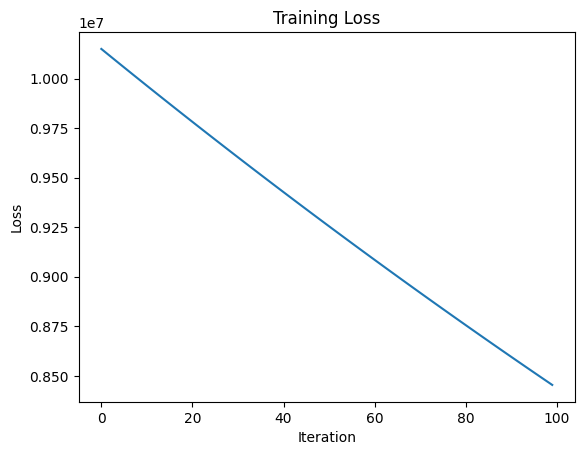

In [614]:
model2 = LinearRegression()

# Train the model3
model2.train(x_train, y_train, learning_rate=1e-8, num_iterations=100)

# Make predictions on the test data
y_pred = model2.predict(x_test)

# Plot the loss graph
plt.plot(model2.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Reasonable learning rate

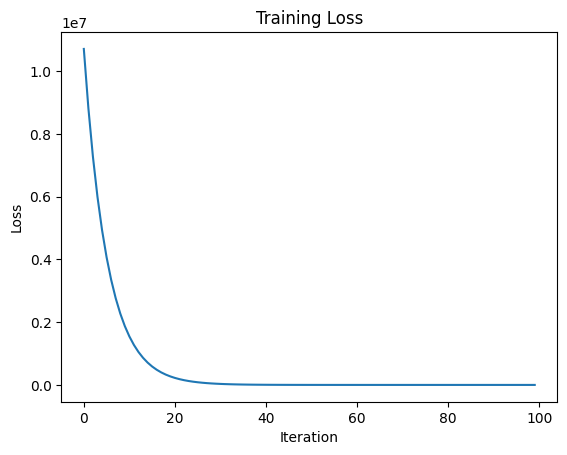

In [615]:
model3 = LinearRegression()

# Train the model3
model3.train(x_train, y_train, learning_rate=1e-6, num_iterations=100)

# Make predictions on the test data
y_pred = model3.predict(x_test)

# Plot the loss graph
plt.plot(model3.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Compute MSE, RSME, MAE, MAPE on test set


In [616]:
y_pred = y_pred.detach().numpy()
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 502.78018
RMSE: 22.42276
MAE: 18.198547
MAPE: 0.016806174
